In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('training_dataset.csv')
dataset_test = pd.read_csv('test_dataset.csv')
X = dataset[['grade','bathrooms','sqft_living','waterfront','view','sqft_basement','sqft_above','bedrooms','condition','yr_built','lat','sqft_lot15','sqft_living15']]
y = dataset['price']
X_test_Final=dataset_test[['grade','bathrooms','sqft_living','waterfront','view','sqft_basement','sqft_above','bedrooms','condition','yr_built','lat','sqft_lot15','sqft_living15']]

dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.761400e+04,1.761400e+04,17614.000000,17614.000000,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,4.569068e+09,5.408514e+05,3.372431,2.113475,2080.915692,1.513310e+04,1.495856,0.007097,0.233848,3.409844,7.660100,1789.456398,291.459294,1970.917566,80.774384,98078.043204,47.560487,-122.214127,1985.633303,12680.009424
std,2.869570e+09,3.685506e+05,0.935641,0.773550,923.863759,4.194362e+04,0.540092,0.083944,0.765230,0.649949,1.179174,831.418845,443.419741,29.425821,393.288442,53.473239,0.138408,0.140161,685.581487,26713.761385
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.122052e+09,3.225000e+05,3.000000,1.500000,1420.000000,5.053250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471600,-122.328000,1480.000000,5100.000000
50%,3.904985e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.607000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572700,-122.230000,1840.000000,7600.000000
75%,7.300200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10057.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**DATA CLEANING **

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


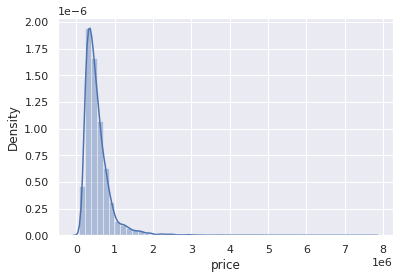

In [3]:
sns.distplot(dataset['price'])

**Cleaning Price by taking 99 quantile**

In [4]:
q = dataset['price'].quantile(0.99)
dataset = dataset[dataset['price']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.743500e+04,17435,1.743500e+04,17435.000000,17435.000000,17435.000000,1.743500e+04,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.575752e+09,NaN,5.187197e+05,3.361801,2.095397,2050.568397,1.500374e+04,1.491913,0.005277,0.216748,3.409062,7.629022,1766.758589,283.809808,1970.909664,78.052767,98078.153656,47.559862,-122.213835,1970.841698,12600.248523
std,2.869714e+09,NaN,2.845372e+05,0.928367,0.748383,863.046329,4.137255e+04,0.539288,0.072451,0.730681,0.649148,1.138320,793.455148,430.421942,29.350186,386.873455,53.428323,0.138884,0.140545,668.965411,26555.161682
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.123049e+09,NaN,3.200000e+05,3.000000,1.500000,1420.000000,5.038000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.469500,-122.328000,1480.000000,5100.000000
50%,3.905041e+09,NaN,4.499990e+05,3.000000,2.250000,1900.000000,7.568000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,1830.000000,7574.000000
75%,7.301000e+09,NaN,6.360500e+05,4.000000,2.500000,2520.000000,1.052650e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1996.000000,0.000000,98118.000000,47.678300,-122.124000,2340.000000,10000.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


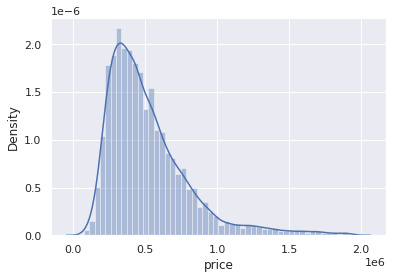

In [5]:
sns.distplot(dataset['price'])

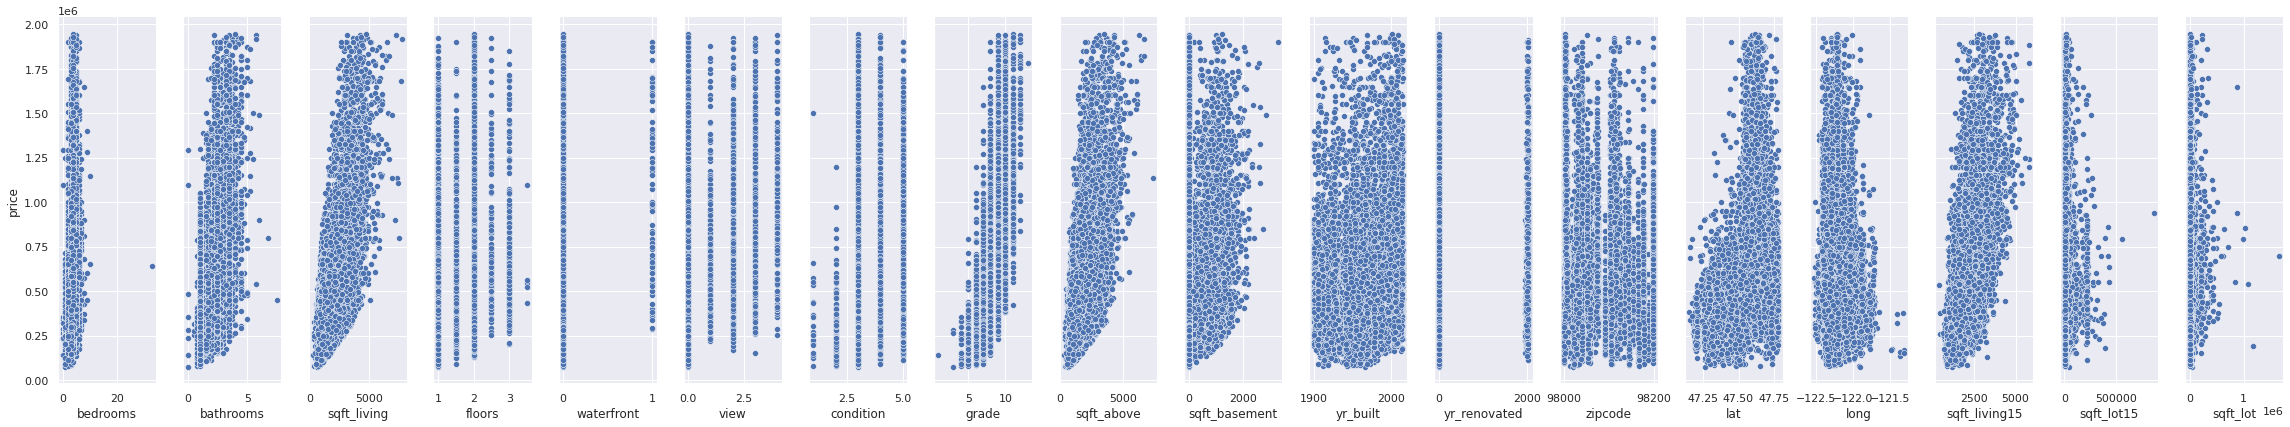

In [6]:

sns.pairplot(dataset,
                  x_vars =['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','sqft_lot'],
                  y_vars ='price',height=6,aspect=0.3,diag_kind='reg')

**Taking the  Log Value of Price **

In [7]:
log_price=np.log(dataset['price'])
dataset['log_price']=log_price
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
count,1.743500e+04,17435,1.743500e+04,17435.000000,17435.000000,17435.000000,1.743500e+04,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000,17435.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.575752e+09,NaN,5.187197e+05,3.361801,2.095397,2050.568397,1.500374e+04,1.491913,0.005277,0.216748,3.409062,7.629022,1766.758589,283.809808,1970.909664,78.052767,98078.153656,47.559862,-122.213835,1970.841698,12600.248523,13.031463
std,2.869714e+09,NaN,2.845372e+05,0.928367,0.748383,863.046329,4.137255e+04,0.539288,0.072451,0.730681,0.649148,1.138320,793.455148,430.421942,29.350186,386.873455,53.428323,0.138884,0.140545,668.965411,26555.161682,0.498977
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,11.225243
25%,2.123049e+09,NaN,3.200000e+05,3.000000,1.500000,1420.000000,5.038000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.469500,-122.328000,1480.000000,5100.000000,12.676076
50%,3.905041e+09,NaN,4.499990e+05,3.000000,2.250000,1900.000000,7.568000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,1830.000000,7574.000000,13.017001
75%,7.301000e+09,NaN,6.360500e+05,4.000000,2.500000,2520.000000,1.052650e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1996.000000,0.000000,98118.000000,47.678300,-122.124000,2340.000000,10000.500000,13.363032


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


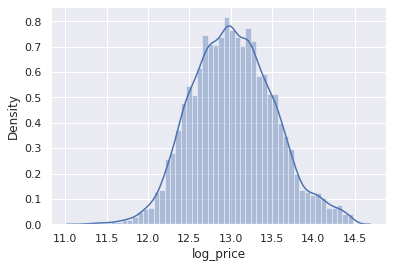

In [8]:
sns.distplot(dataset['log_price'])

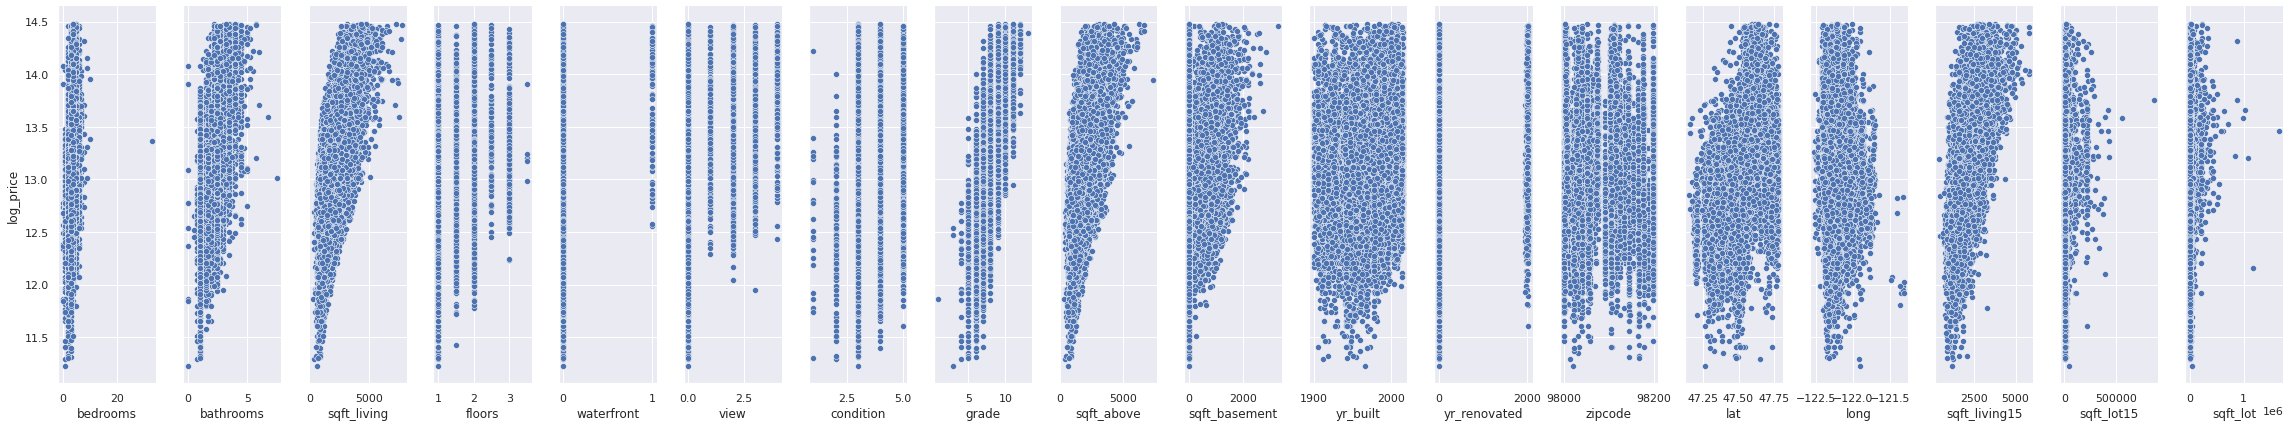

In [9]:

sns.pairplot(dataset,
                  x_vars =['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','sqft_lot'],
                  y_vars ='log_price',height=6,aspect=0.3,diag_kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


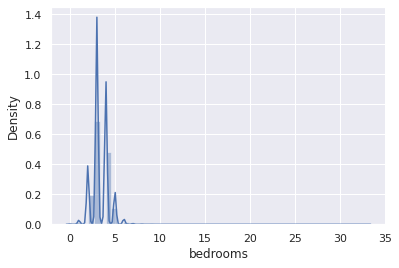

In [10]:
sns.distplot(dataset['bedrooms'])

In [11]:
q = dataset['bedrooms'].quantile(0.99)
dataset = dataset[dataset['bedrooms']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
count,1.718500e+04,17185,1.718500e+04,17185.000000,17185.000000,17185.000000,1.718500e+04,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580327e+09,NaN,5.162377e+05,3.317894,2.081277,2034.049985,1.495971e+04,1.490370,0.005237,0.213966,3.408321,7.625080,1757.123829,276.926157,1971.025429,76.635787,98078.122723,47.559488,-122.213444,1967.734361,12586.879372,13.027085
std,2.871294e+09,NaN,2.830021e+05,0.831761,0.734111,849.508139,4.143526e+04,0.539531,0.072180,0.725398,0.648905,1.137677,787.358725,422.374134,29.339148,383.492787,53.426084,0.139119,0.140918,667.532241,26503.976454,0.497992
min,1.200019e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,11.225243
25%,2.124049e+09,NaN,3.200000e+05,3.000000,1.500000,1410.000000,5.029000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.468800,-122.328000,1480.000000,5100.000000,12.676076
50%,3.905081e+09,NaN,4.474500e+05,3.000000,2.250000,1890.000000,7.560000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1830.000000,7566.000000,13.011320
75%,7.304301e+09,NaN,6.325000e+05,4.000000,2.500000,2500.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,530.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10000.000000,13.357435


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


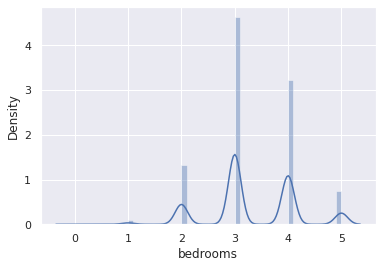

In [12]:
sns.distplot(dataset['bedrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


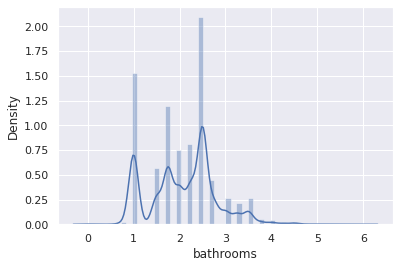

In [13]:
sns.distplot(dataset['bathrooms'])

In [14]:
q = dataset['bathrooms'].quantile(0.99)
dataset = dataset[dataset['bathrooms']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
count,1.698700e+04,16987,1.698700e+04,16987.000000,16987.000000,16987.000000,1.698700e+04,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000,16987.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.590382e+09,NaN,5.086677e+05,3.305587,2.055101,2006.711132,1.464599e+04,1.484782,0.005180,0.207629,3.409961,7.596633,1734.013952,272.697180,1970.782481,75.647083,98078.309884,47.559177,-122.214236,1952.347913,12366.770059,13.016902
std,2.871291e+09,NaN,2.723187e+05,0.825984,0.695662,807.693566,4.042908e+04,0.538592,0.071791,0.714136,0.649477,1.105261,752.265062,415.952881,29.306803,381.102846,53.435126,0.139440,0.140707,648.016534,25379.049965,0.490044
min,1.200019e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,11.225243
25%,2.126049e+09,NaN,3.199250e+05,3.000000,1.500000,1400.000000,5.004500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.467200,-122.329000,1480.000000,5097.500000,12.675842
50%,3.905121e+09,NaN,4.445000e+05,3.000000,2.250000,1870.000000,7.535000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.570700,-122.231000,1820.000000,7560.000000,13.004705
75%,7.312200e+09,NaN,6.250000e+05,4.000000,2.500000,2480.000000,1.042300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,520.000000,1996.000000,0.000000,98118.000000,47.678550,-122.125000,2320.000000,9959.000000,13.345507


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


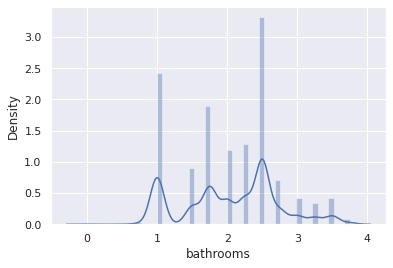

In [15]:
sns.distplot(dataset['bathrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


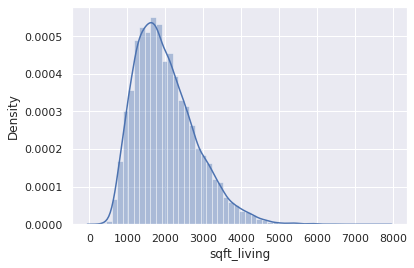

In [16]:
sns.distplot(dataset['sqft_living'])

In [17]:
q = dataset['sqft_living'].quantile(0.99)
dataset = dataset[dataset['sqft_living']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
count,1.681300e+04,16813,1.681300e+04,16813.000000,16813.000000,16813.000000,1.681300e+04,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000,16813.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.597484e+09,NaN,5.015767e+05,3.296794,2.042735,1977.601261,1.431791e+04,1.480759,0.005056,0.199548,3.411884,7.568727,1711.576518,266.024743,1970.561411,75.240052,98078.562779,47.558944,-122.215182,1935.645274,12140.722298,13.007325
std,2.871435e+09,NaN,2.620484e+05,0.822774,0.686889,757.137996,3.989677e+04,0.538491,0.070925,0.699049,0.650349,1.070716,717.332378,404.245146,29.316847,380.108535,53.460423,0.139688,0.140544,623.494068,24883.684343,0.482246
min,1.200019e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,11.225243
25%,2.128000e+09,NaN,3.170000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.466200,-122.330000,1470.000000,5070.000000,12.666657
50%,3.924500e+09,NaN,4.400000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1974.000000,0.000000,98070.000000,47.570600,-122.233000,1810.000000,7520.000000,12.994530
75%,7.326200e+09,NaN,6.195000e+05,4.000000,2.500000,2452.000000,1.032300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,510.000000,1996.000000,0.000000,98118.000000,47.678700,-122.126000,2300.000000,9893.000000,13.336668


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


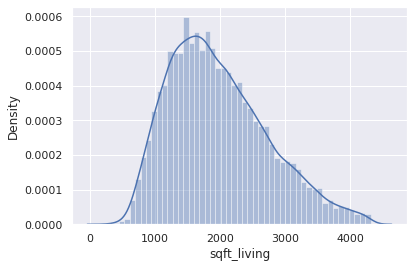

In [18]:
sns.distplot(dataset['sqft_living'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


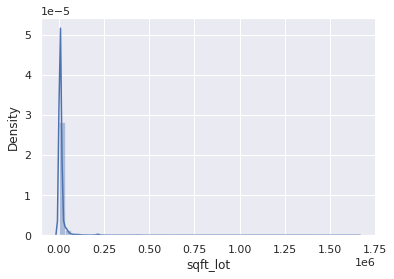

In [19]:
sns.distplot(dataset['sqft_lot'])

In [20]:
q = dataset['sqft_lot'].quantile(0.99)
dataset = dataset[dataset['sqft_lot']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
count,1.664400e+04,16644,1.664400e+04,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.624793e+09,NaN,5.004984e+05,3.297404,2.039849,1972.121846,11263.199351,1.479993,0.005047,0.196167,3.413482,7.563987,1705.627373,266.494472,1970.430005,75.046323,98078.922855,47.559802,-122.217075,1932.577626,10655.806897,13.004958
std,2.870398e+09,NaN,2.619428e+05,0.822455,0.686214,753.430141,17039.713276,0.538955,0.070864,0.693768,0.650497,1.067422,712.781934,404.203232,29.357290,379.641677,53.550763,0.139108,0.138923,623.408986,17933.706057,0.482480
min,1.200019e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,659.000000,11.225243
25%,2.159575e+09,NaN,3.152062e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.469075,-122.330000,1470.000000,5040.000000,12.660982
50%,3.992701e+09,NaN,4.400000e+05,3.000000,2.000000,1860.000000,7480.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98072.000000,47.571150,-122.236000,1810.000000,7500.000000,12.994530
75%,7.338927e+09,NaN,6.169500e+05,4.000000,2.500000,2440.000000,10200.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2110.000000,511.250000,1996.000000,0.000000,98118.000000,47.678900,-122.129000,2300.000000,9790.000000,13.332543


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


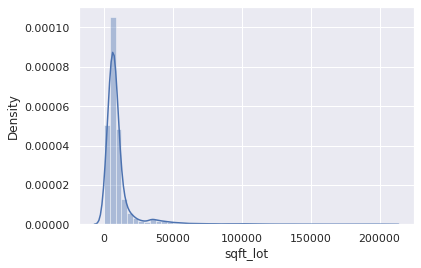

In [21]:
sns.distplot(dataset['sqft_lot'])

In [22]:
log_sqft_lot=np.log(dataset['sqft_lot'])
dataset['log_sqft_lot']=log_sqft_lot
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_lot
count,1.664400e+04,16644,1.664400e+04,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000,16644.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.624793e+09,NaN,5.004984e+05,3.297404,2.039849,1972.121846,11263.199351,1.479993,0.005047,0.196167,3.413482,7.563987,1705.627373,266.494472,1970.430005,75.046323,98078.922855,47.559802,-122.217075,1932.577626,10655.806897,13.004958,8.920610
std,2.870398e+09,NaN,2.619428e+05,0.822455,0.686214,753.430141,17039.713276,0.538955,0.070864,0.693768,0.650497,1.067422,712.781934,404.203232,29.357290,379.641677,53.550763,0.139108,0.138923,623.408986,17933.706057,0.482480,0.813580
min,1.200019e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,659.000000,11.225243,6.253829
25%,2.159575e+09,NaN,3.152062e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.469075,-122.330000,1470.000000,5040.000000,12.660982,8.517193
50%,3.992701e+09,NaN,4.400000e+05,3.000000,2.000000,1860.000000,7480.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98072.000000,47.571150,-122.236000,1810.000000,7500.000000,12.994530,8.919988
75%,7.338927e+09,NaN,6.169500e+05,4.000000,2.500000,2440.000000,10200.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2110.000000,511.250000,1996.000000,0.000000,98118.000000,47.678900,-122.129000,2300.000000,9790.000000,13.332543,9.230143


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


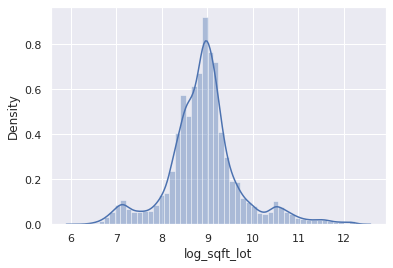

In [23]:
sns.distplot(dataset['log_sqft_lot'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


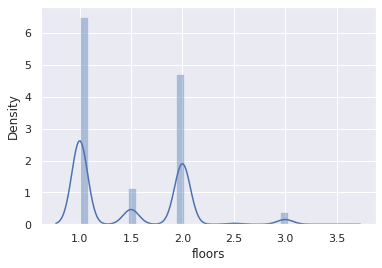

In [24]:
sns.distplot(dataset['floors'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


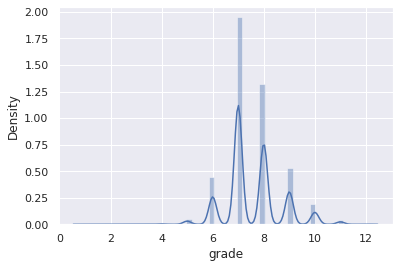

In [25]:
sns.distplot(dataset['grade'])

In [26]:
q = dataset['grade'].quantile(0.01)
dataset = dataset[dataset['grade']>q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_lot
count,1.643000e+04,16430,1.643000e+04,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.00000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000,16430.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.632776e+09,NaN,5.039058e+05,3.310773,2.052556,1985.367681,11214.554291,1.485180,0.004869,0.196652,3.412964,7.599270,1715.847657,269.520024,1970.881254,75.42039,98078.933719,47.560693,-122.217504,1939.994218,10594.006939,13.014338,8.917598
std,2.870651e+09,NaN,2.616148e+05,0.812181,0.680407,748.159339,16978.383274,0.540053,0.069611,0.694036,0.646798,1.026984,710.665183,405.639793,29.199373,380.55969,53.497095,0.139067,0.137786,622.612365,17624.098108,0.475786,0.812667
min,1.200019e+06,NaN,8.200000e+04,0.000000,0.000000,390.000000,520.000000,1.000000,0.000000,0.000000,1.000000,6.000000,390.000000,0.000000,1900.000000,0.00000,98001.000000,47.155900,-122.511000,399.000000,659.000000,11.314475,6.253829
25%,2.172001e+09,NaN,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.00000,98033.000000,47.469425,-122.330000,1480.000000,5038.500000,12.676076,8.517193
50%,4.012800e+09,NaN,4.425000e+05,3.000000,2.250000,1870.000000,7482.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1974.000000,0.00000,98072.000000,47.572800,-122.236000,1820.000000,7500.000000,13.000196,8.920255
75%,7.349766e+09,NaN,6.200000e+05,4.000000,2.500000,2460.000000,10185.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,520.000000,1996.000000,0.00000,98118.000000,47.679400,-122.129000,2303.000000,9770.000000,13.337475,9.228720


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


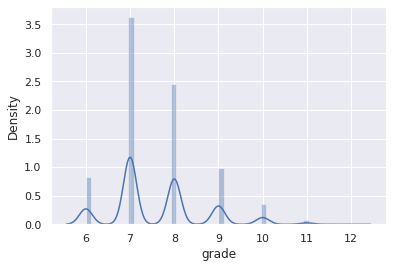

In [27]:
sns.distplot(dataset['grade'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


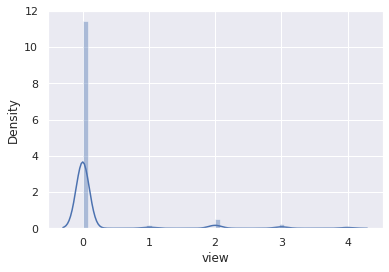

In [28]:
sns.distplot(dataset['view'])

In [29]:
q = dataset['view'].quantile(0.99)
dataset = dataset[dataset['view']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_lot
count,1.626100e+04,16261,1.626100e+04,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.623728e+09,NaN,4.984482e+05,3.310559,2.048828,1977.751430,11145.974171,1.485056,0.001107,0.157124,3.410737,7.589263,1712.959412,264.792018,1970.987701,72.283992,98078.689441,47.560690,-122.216842,1932.900990,10522.409507,13.006498,8.912274
std,2.868789e+09,NaN,2.545041e+05,0.810664,0.679711,744.706621,16882.516368,0.540339,0.033253,0.578603,0.645244,1.020385,711.221956,400.549616,29.228309,372.884735,53.350543,0.139232,0.137776,618.609716,17437.228287,0.470157,0.811359
min,1.200019e+06,NaN,8.200000e+04,0.000000,0.000000,390.000000,520.000000,1.000000,0.000000,0.000000,1.000000,6.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.507000,399.000000,659.000000,11.314475,6.253829
25%,2.162000e+09,NaN,3.199500e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.469300,-122.329000,1470.000000,5013.000000,12.675920,8.517193
50%,3.995700e+09,NaN,4.400000e+05,3.000000,2.250000,1860.000000,7447.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1975.000000,0.000000,98070.000000,47.572900,-122.235000,1810.000000,7500.000000,12.994530,8.915567
75%,7.338220e+09,NaN,6.150000e+05,4.000000,2.500000,2440.000000,10125.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2110.000000,510.000000,1996.000000,0.000000,98118.000000,47.679500,-122.128000,2290.000000,9750.000000,13.329378,9.222763


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


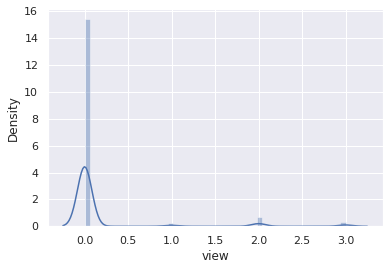

In [30]:
sns.distplot(dataset['view'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


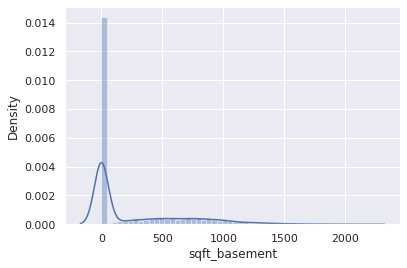

In [31]:
sns.distplot(dataset['sqft_basement'])

In [32]:
q = dataset['sqft_basement'].quantile(0.99)
dataset = dataset[dataset['sqft_basement']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_lot
count,1.609700e+04,16097,1.609700e+04,16097.000000,16097.00000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000,16097.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.628577e+09,NaN,4.951483e+05,3.301920,2.04316,1962.473194,11065.852208,1.489439,0.001118,0.150711,3.407281,7.580108,1711.580543,250.892651,1971.006212,71.901162,98078.790706,47.560587,-122.216860,1926.038951,10463.743244,13.001241,8.905572
std,2.869671e+09,NaN,2.510494e+05,0.806467,0.67875,731.833038,16843.689400,0.540897,0.033422,0.566983,0.643531,1.016787,713.983929,377.734503,29.325180,371.923834,53.228905,0.139384,0.138075,615.500557,17439.099272,0.467459,0.809813
min,1.200019e+06,NaN,8.200000e+04,0.000000,0.00000,390.000000,520.000000,1.000000,0.000000,0.000000,1.000000,6.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.507000,399.000000,659.000000,11.314475,6.253829
25%,2.172001e+09,NaN,3.180000e+05,3.000000,1.50000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.468800,-122.330000,1470.000000,5000.000000,12.669807,8.517193
50%,3.999201e+09,NaN,4.395000e+05,3.000000,2.00000,1850.000000,7410.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1975.000000,0.000000,98072.000000,47.572800,-122.235000,1800.000000,7475.000000,12.993393,8.910586
75%,7.338402e+09,NaN,6.100000e+05,4.000000,2.50000,2420.000000,10051.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,500.000000,1997.000000,0.000000,98118.000000,47.679700,-122.128000,2280.000000,9700.000000,13.321214,9.215427


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


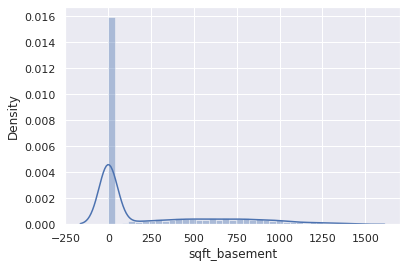

In [33]:
sns.distplot(dataset['sqft_basement'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


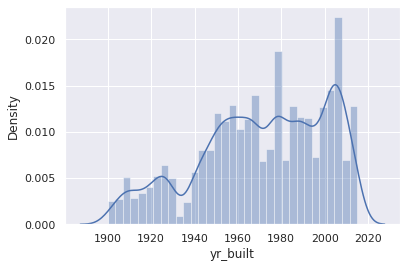

In [34]:
sns.distplot(dataset['yr_built'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


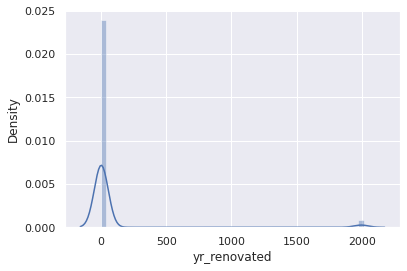

In [35]:
sns.distplot(dataset['yr_renovated'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


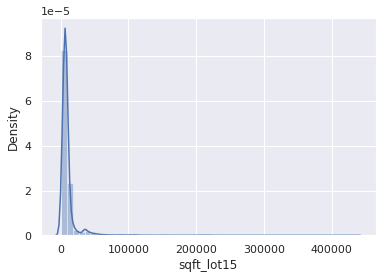

In [36]:
sns.distplot(dataset['sqft_lot15'])

In [37]:
q = dataset['sqft_lot15'].quantile(0.99)
dataset = dataset[dataset['sqft_lot15']<q]
dataset.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_lot
count,1.593600e+04,15936,1.593600e+04,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.00000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.650554e+09,NaN,4.950126e+05,3.303464,2.042545,1958.857555,10116.922314,1.490399,0.001067,0.149159,3.407191,7.57756,1707.739709,251.117846,1970.926393,72.002887,98079.134162,47.561610,-122.218511,1921.811621,9109.551079,13.000624,8.880201
std,2.868991e+09,NaN,2.514656e+05,0.807109,0.679154,730.738019,13050.785707,0.541444,0.032645,0.563643,0.643411,1.01418,712.086121,377.423786,29.389490,372.180974,53.326479,0.138922,0.136630,614.080992,8615.729529,0.468071,0.771107
min,1.200019e+06,NaN,8.200000e+04,0.000000,0.000000,390.000000,520.000000,1.000000,0.000000,0.000000,1.000000,6.00000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.502000,460.000000,659.000000,11.314475,6.253829
25%,2.202500e+09,NaN,3.170000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.00000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.471475,-122.330000,1470.000000,5000.000000,12.666657,8.517193
50%,4.024101e+09,NaN,4.390000e+05,3.000000,2.000000,1850.000000,7350.000000,1.500000,0.000000,0.000000,3.000000,7.00000,1520.000000,0.000000,1975.000000,0.000000,98072.000000,47.574000,-122.239000,1800.000000,7435.500000,12.992255,8.902456
75%,7.375150e+09,NaN,6.100000e+05,4.000000,2.500000,2420.000000,9957.500000,2.000000,0.000000,0.000000,4.000000,8.00000,2110.000000,500.000000,1997.000000,0.000000,98118.000000,47.680100,-122.131000,2270.750000,9625.000000,13.321214,9.206081


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


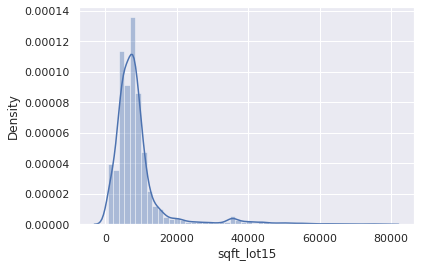

In [38]:
sns.distplot(dataset['sqft_lot15'])

**Feature Selection **

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = dataset[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_basement','yr_built','lat','sqft_living15','log_sqft_lot']]
y = dataset['log_price']
scores = cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print("MSE:", -scores)
print(-scores.mean())
print(scores.std())

MSE: [0.05988588 0.0581648  0.06317719 0.05903912 0.05697782]
0.0594489627283439
0.0020982945272500185


In [40]:

X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     3572.
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:16:27   Log-Likelihood:                -106.71
No. Observations:               15936   AIC:                             239.4
Df Residuals:                   15923   BIC:                             339.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -45.5332      0.766    -59.472      0.000     -47.034     -44.033
bedrooms         -0.0151      0.003     -4.896      0.000      -0.021      -0.009
bathrooms         0.0775      0.005     16.244      0.000       0.068       0.087
sqft_living       0.0002   5.94e-06     33.392      0.000       0.000       0.000
waterfront        0.3460      0.060      5.773      0.000       0.229       0.464
view              0.0577      0.004     15.821      0.000       0.051       0.065
condition         0.0591      0.003     17.971      0.000       0.053       0.066
grade             0.1602      0.003     49.930      0.000       0.154       0.166
sqft_basement -2.504e-05   6.08e-06     -4.121      0.000    -3.7e-05   -1.31e-05
yr_built         -0.0036    9.2e-05    -39.445      0.000      -0.004      -0.003
lat               1.3476      0.015     91.266      0.000       1.319       1.377
sqft_living15  9.942e-05   5.29e-06     18.796      0.000    8.91e-05       0.000
log_sqft_lot     -0.0576      0.003    -19.576      0.000      -0.063      -0.052
==============================================================================
Omnibus:                      280.620   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.554
Skew:                           0.067   Prob(JB):                    2.31e-121
Kurtosis:                       3.905   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
dataset_corr_price = dataset.corr()['log_price'][['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','log_sqft_lot']]
dataset_corr_price

bedrooms         0.297969
bathrooms        0.461993
sqft_living      0.623671
waterfront       0.044206
view             0.228005
condition        0.038131
grade            0.639476
sqft_above       0.523814
sqft_basement    0.219221
yr_built         0.041220
yr_renovated     0.097123
lat              0.490800
long             0.050047
sqft_living15    0.554645
sqft_lot15       0.092800
log_sqft_lot     0.053480
Name: log_price, dtype: float64

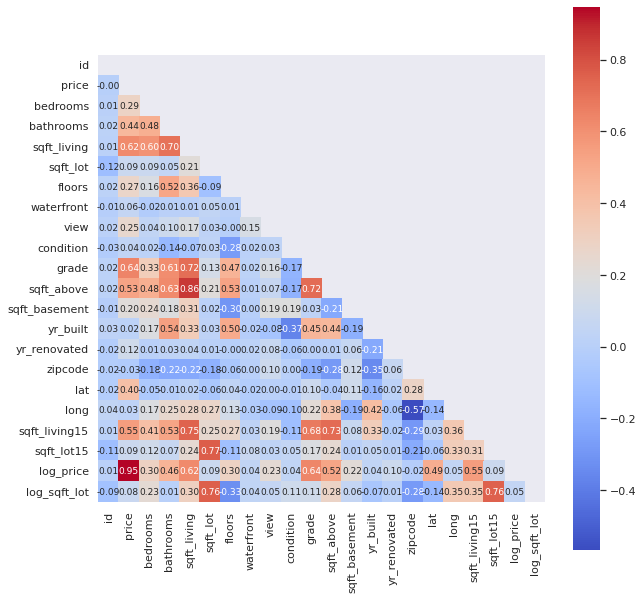

In [42]:
dataset_corr = dataset.corr()
corr_val = dataset_corr.where(np.triu(np.ones(dataset_corr.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(dataset_corr,annot=True, square=True, fmt='.2f',\
            annot_kws={'size':9}, mask = np.triu(corr_val), cmap= "coolwarm")

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = reg.predict(X_test)
df=pd.DataFrame(y_pred,columns=['Predictions'])
df

,Predictions
0,13.008243
1,12.279759
2,12.634376
3,12.906636
4,12.670669
...,...
3183,13.363064
3184,12.903800
3185,13.178577
3186,14.092282


In [46]:
y_test=y_test.reset_index(drop=True)
df['y_test']=y_test
df

,Predictions,y_test
0,13.008243,13.632189
1,12.279759,12.691580
2,12.634376,12.404924
3,12.906636,12.577636
4,12.670669,12.832011
...,...,...
3183,13.363064,13.464534
3184,12.903800,12.987688
3185,13.178577,13.226723
3186,14.092282,14.038654


In [47]:
from sklearn.metrics import explained_variance_score
expl_reg = explained_variance_score(y_pred,y_test)
expl_reg

0.6334010545827786

In [48]:
from sklearn import metrics
from math import sqrt

print(metrics.mean_absolute_error(y_test, y_pred))

0.19306675723257738


In [49]:
y_train_pred = reg.predict(X_train)
print(metrics.mean_absolute_error(y_train, y_train_pred))

0.18737473330066667


In [50]:
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred))
print("Training MSE:",metrics.mean_squared_error(y_train, y_train_pred))

Test MSE: 0.061006720667836446
Training MSE: 0.05894953538463862


In [51]:
ML_RMSE= sqrt(metrics.mean_squared_error(y_test, y_pred))


# **Polynomial Regression Degree 2**

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
reg2 = LinearRegression()
reg2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = reg2.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
df=pd.DataFrame(y_pred,columns=['Predictions'])
df

,Predictions
0,13.071306
1,12.580675
2,12.476987
3,12.827998
4,12.785284
...,...
3183,13.376147
3184,12.931753
3185,13.254859
3186,13.990548


In [54]:
y_test=y_test.reset_index(drop=True)
df['y_test']=y_test
df

,Predictions,y_test
0,13.071306,13.632189
1,12.580675,12.691580
2,12.476987,12.404924
3,12.827998,12.577636
4,12.785284,12.832011
...,...,...
3183,13.376147,13.464534
3184,12.931753,12.987688
3185,13.254859,13.226723
3186,13.990548,14.038654


In [55]:
from sklearn.metrics import explained_variance_score
expl_reg2 = explained_variance_score(y_pred,y_test)
expl_reg2

0.7113395479756266

In [56]:
from sklearn import metrics
from math import sqrt

print(metrics.mean_absolute_error(y_test, y_pred))

0.16949747468888715


In [57]:
POLY2_RMSE= sqrt(metrics.mean_squared_error(y_test, y_pred))
POLY2_RMSE

0.22251102776268658

In [58]:
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred))
print("Training MSE:",metrics.mean_squared_error(y_train, y_train_pred))  

Test MSE: 0.04951115747600708
Training MSE: 0.05894953538463862


# **Polynomial Regression Degree 3**

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg1 = PolynomialFeatures(degree = 3)
X_poly = poly_reg1.fit_transform(X_train)
reg3 = LinearRegression()
reg3.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred = reg3.predict(poly_reg1.transform(X_test))
np.set_printoptions(precision=2)
df=pd.DataFrame(y_pred,columns=['Predictions'])
df

,Predictions
0,13.121692
1,12.669631
2,12.452493
3,12.878105
4,12.759136
...,...
3183,13.374256
3184,13.014666
3185,13.279088
3186,14.140390


In [61]:
y_test=y_test.reset_index(drop=True)
df['y_test']=y_test
df

,Predictions,y_test
0,13.121692,13.632189
1,12.669631,12.691580
2,12.452493,12.404924
3,12.878105,12.577636
4,12.759136,12.832011
...,...,...
3183,13.374256,13.464534
3184,13.014666,12.987688
3185,13.279088,13.226723
3186,14.140390,14.038654


In [62]:
from sklearn.metrics import explained_variance_score
expl_reg3 = explained_variance_score(y_pred,y_test)
expl_reg3

0.7368308405679787

In [63]:
from sklearn import metrics
from math import sqrt

print(metrics.mean_absolute_error(y_test, y_pred))

0.16386122568451741


In [64]:
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred))
print("Training MSE:",metrics.mean_squared_error(y_train, y_train_pred)) 

Test MSE: 0.046808387978884036
Training MSE: 0.05894953538463862


In [65]:
POLY3_RMSE= sqrt(metrics.mean_squared_error(y_test, y_pred))
POLY3_RMSE

0.21635246238229885

# **Decision Tree**

In [66]:
from sklearn.tree import DecisionTreeRegressor
reg4 = DecisionTreeRegressor(random_state = 0)
reg4.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [67]:
y_pred = reg4.predict(X_test)
np.set_printoptions(precision=2)
df=pd.DataFrame(y_pred,columns=['Predictions'])
df

,Predictions
0,13.263863
1,12.278393
2,12.345835
3,12.394418
4,13.071070
...,...
3183,13.567049
3184,13.176852
3185,13.102161
3186,14.285514


In [68]:
y_test=y_test.reset_index(drop=True)
df['y_test']=y_test
df

,Predictions,y_test
0,13.263863,13.632189
1,12.278393,12.691580
2,12.345835,12.404924
3,12.394418,12.577636
4,13.071070,12.832011
...,...,...
3183,13.567049,13.464534
3184,13.176852,12.987688
3185,13.102161,13.226723
3186,14.285514,14.038654


In [69]:
from sklearn.metrics import explained_variance_score
expl_reg4 = explained_variance_score(y_pred,y_test)
expl_reg4

0.7058990885073164

In [70]:
from sklearn import metrics
from math import sqrt

print(metrics.mean_absolute_error(y_test, y_pred))

0.18753716532990125


In [71]:
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred))
print("Training MSE:",metrics.mean_squared_error(y_train, y_train_pred)) 

Test MSE: 0.06603378223888486
Training MSE: 0.05894953538463862


In [72]:
DES_RMSE= sqrt(metrics.mean_squared_error(y_test, y_pred))
DES_RMSE

0.2569703917553243

# **Random Forest**

In [73]:
from sklearn.ensemble import RandomForestRegressor
reg5 = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg5.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [74]:
y_pred = reg5.predict(X_test)
np.set_printoptions(precision=2)
df=pd.DataFrame(y_pred,columns=['Predictions'])
df

,Predictions
0,13.372889
1,12.615156
2,12.414332
3,12.608345
4,12.847450
...,...
3183,13.663400
3184,12.874612
3185,13.328186
3186,14.024556


In [75]:
y_test=y_test.reset_index(drop=True)
df['y_test']=y_test
df

,Predictions,y_test
0,13.372889,13.632189
1,12.615156,12.691580
2,12.414332,12.404924
3,12.608345,12.577636
4,12.847450,12.832011
...,...,...
3183,13.663400,13.464534
3184,12.874612,12.987688
3185,13.328186,13.226723
3186,14.024556,14.038654


# **Calculating our predictions on X_test_final based on the test CSV**

In [76]:
from sklearn.ensemble import RandomForestRegressor
reg6_final = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg6_final.fit(X, y)

In [77]:
y_pred_final = reg6_final.predict(X_test_Final)
np.set_printoptions(precision=2)
df=pd.DataFrame(y_pred_final,columns=['Predictions'])
df

In [78]:

df['id']=dataset_test['id']
df

In [79]:
df.to_csv('King_county_dataset_Result.csv', index=False)


In [80]:
from sklearn.metrics import explained_variance_score
expl_reg5 = explained_variance_score(y_pred,y_test)
expl_reg5

0.8145639296090312

In [81]:
from sklearn import metrics
from math import sqrt

print(metrics.mean_absolute_error(y_test, y_pred))

0.13857076583640368


In [82]:
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred))
print("Training MSE:",metrics.mean_squared_error(y_train, y_train_pred)) 

Test MSE: 0.035807873621900146
Training MSE: 0.05894953538463862


In [83]:
RAN_RMSE= sqrt(metrics.mean_squared_error(y_test, y_pred))
RAN_RMSE

0.18922968483274538

In [84]:
reg_score=round(reg.score(X_test,y_test)*100)
reg2_score =round(reg2.score(poly_reg.transform(X_test),y_test)*100)
reg3_score =round(reg3.score(poly_reg1.transform(X_test),y_test)*100)
reg4_score=round(reg4.score(X_test,y_test)*100)
reg5_score=round(reg5.score(X_test,y_test)*100)


print("Multiple Linear Regression Model Score is ",reg_score)
print("Polynomial Degree 2 Regression Model Score is ",reg2_score)
print("Polynomial Degree 3 Regression Model Score is ",reg3_score)
print("Decision tree  Regression Model Score is ",reg4_score)
print("Random Forest Regression Model Score is ",reg5_score)





Multiple Linear Regression Model Score is  72
Polynomial Degree 2 Regression Model Score is  77
Polynomial Degree 3 Regression Model Score is  78
Decision tree  Regression Model Score is  70
Random Forest Regression Model Score is  84


In [85]:

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Polynomial Degree2 ','Polynomial degree 3','Decision Tree','Random forest Regression'],
                            'Score':[reg_score,reg2_score,reg3_score,reg4_score,reg5_score],
                            'Explained Variance Score':[expl_reg,expl_reg2,expl_reg3,expl_reg4,expl_reg5],
                            'RMSE':[ML_RMSE,POLY2_RMSE,POLY3_RMSE,DES_RMSE,RAN_RMSE]
                           })
models_score.sort_values(by='Score',ascending=False)

,Model,Score,Explained Variance Score,RMSE
4,Random forest Regression,84,0.814564,0.189230
2,Polynomial degree 3,78,0.736831,0.216352
1,Polynomial Degree2,77,0.711340,0.222511
0,Multiple Linear Regression,72,0.633401,0.246995
3,Decision Tree,70,0.705899,0.256970
